Pyber Ride Sharing 

Analysis 
•Rural Areas had less drivers and riders of Pyber ride sharing, but no well defined trend in relationship to average fare. This could possibly be explained by varying distances of rides in rural areas or the supply of drivers in rural areas. It doesn't seem to be the case that the number of drivers in rural areas correlates to average fare, but drivers in rural areas only make up 1% of the total drivers while rural areas account for roughly 6% of total fares and rides. We also see data points for average fare well above what is experienced in the city. 
•In general, the number of drivers seems to increase with city classification with rural areas having the least amount of drivers per city and urban areas having more. There are, however, data points for urban areas that have similar nuber of drivers. Perhaps a study of population or geographic size versus number of drivers would be beneficial in exploring this trend.
•There seems to be a negative relationship between the number of rides and the average fare. This is more well defined for the suburban and urban city classifications. This might be explained by the supply of drivers or the average distance a rider is travelling in these cities. Average travel distance might be wirth exploring further. However, if you examine the pie chart, you can observe that cities make up for 63% and 68% of total fare and rides repectively, but the number of drivers in the city is 86.2% of the total drivers. It is possible that there is an over supply or drivers in these cities causing lower prices. A similar, but less dramatic trend is seen with suburban areas. Additionally, when examining the bubble chart for cities, cities with a smaller number of drivers do seem to have a higher average fare in general. This is trend is not as well defined with suburban areas. Again, a comparision to of driver per capita may be helpful. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#path_city = os.path.join('city_data.csv')
#path_ride = os.path.join('ride_data.csv')

#df_city = pd.read_csv(path_city)
#df_ride = pd.read_csv(path_ride)
#read city ride data
df_city=pd.read_csv("raw_data/city_data.csv")
#read ride data
df_ride=pd.read_csv("raw_data/ride_data.csv")
#ride_data=ride_data.set_index("city")
#ride_data.head()


# merge dataframes
df_merged = pd.merge(df_city, df_ride, on='city')

# rearrange columns
col = [0,3,4,5,1,2]
df_city_ride = df_merged.iloc[:,col]

df_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [16]:
# Create group based on the values in the "city column
group_city = df_city_ride.groupby(['city'])

# Calculate Average Fare ($) Per City
average_fare = group_city['fare'].mean()

# Calculate Total Number of Rides Per City
total_rides = group_city['ride_id'].nunique()

# Calculate Total Number of Drivers Per City
total_drivers = group_city['driver_count'].max()

# Determine City Type 
city_type = group_city['type'].max()

# Create dataframe with results
summary_city = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})
# Group by City Type
# Urban
urban = summary_city.loc[summary_city['City Type'] == 'Urban']
total_rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
total_drivers_urban = urban['Total Number of Drivers']

# Suburban
suburban = summary_city.loc[summary_city['City Type'] == 'Suburban']
total_rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
total_drivers_suburban = suburban['Total Number of Drivers']

# Rural
rural = summary_city.loc[summary_city['City Type'] == 'Rural']
total_rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
total_drivers_rural = rural['Total Number of Drivers']

summary_city.head()

,Average Fare ($),Total Number of Rides,Total Number of Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


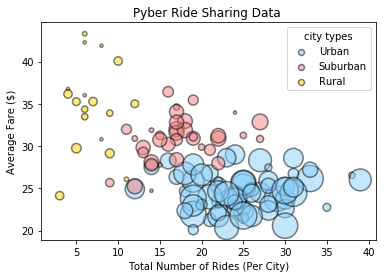

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure()
urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, 
                         color='lightskyblue', alpha=0.5, edgecolor='black', linewidths=1.5, 
                         label='Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, 
                            color='lightcoral', alpha=0.5, edgecolor='black',linewidths=1.5, 
                            label='Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, 
                         color='gold', alpha=0.5, edgecolor='black',linewidths=1.5, 
                         label='Rural')

# label chart
plt.title('Pyber Ride Sharing Data ')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# add and format legend
lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='best',title = 'city types')
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]

plt.show()
plt.savefig("../Images/Pyber_ride_bubble.png")

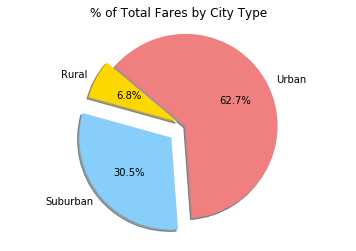

In [25]:
# % of Total Fares by City Type
# Group by city type
group_type = df_city_ride.groupby(['type'])

# Calculate total fare per city type
total_fare_all = group_type['fare'].sum()
total_fare_df = pd.DataFrame({'Total Fare Per Type': total_fare_all})

# Calculate percent of each city type
percent_f_per_type = total_fare_df['Total Fare Per Type'] / total_fare_df['Total Fare Per Type'].sum() * 100 
percentages_fare_df = pd.DataFrame({'Percentage': percent_f_per_type})

# Summarize
percent_fare_type = pd.merge(total_fare_df, percentages_fare_df, right_index=True, left_index=True)

percent_f_rural = percent_fare_type.iloc[0][1]
percent_f_suburban = percent_fare_type.iloc[1][1]
percent_f_urban = percent_fare_type.iloc[2][1]

# User bar chart
fexplode = [0.1, 0.2, 0]
flabels = ['Rural', 'Suburban', 'Urban']
percents_fare = [percent_f_rural, percent_f_suburban, percent_f_urban]
fcolors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_fare, labels=flabels, colors=fcolors, explode=fexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.axis("equal")



plt.savefig("../Images/total_per_type_pie.png")


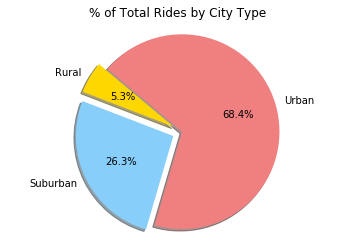

<Figure size 432x288 with 0 Axes>

In [26]:




# % of Total Rides by City Type

# Calculate total rides per city type
total_rides_all = group_type['ride_id'].nunique()
total_rides_df = pd.DataFrame({'Total Rides Per Type': total_rides_all})

# Calculate percent of each city type
percent_r_per_type = total_rides_df['Total Rides Per Type'] / total_rides_df['Total Rides Per Type'].sum() * 100 
percentages_rides_df = pd.DataFrame({'Percentage': percent_r_per_type})

# Summarize
percent_rides_type = pd.merge(total_rides_df, percentages_rides_df, right_index=True, left_index=True)

percent_r_rural = percent_rides_type.iloc[0][1]
percent_r_suburban = percent_rides_type.iloc[1][1]
percent_r_urban = percent_rides_type.iloc[2][1]

# User bar chart
rexplode = [0.1, 0.1, 0]
rlabels = ['Rural', 'Suburban', 'Urban']
percents_rides = [percent_r_rural, percent_r_suburban, percent_r_urban]
rcolors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_rides, labels=rlabels, colors=rcolors, explode=rexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
plt.axis("equal")

plt.show()
plt.savefig("../Images/per_of_Total_Rides_by_City_Type.png")

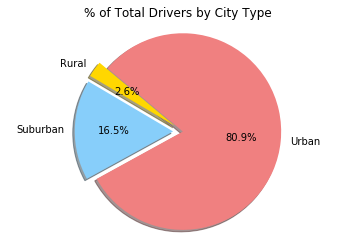

<Figure size 432x288 with 0 Axes>

In [27]:
# % of Total Drivers by City Type

# Calculate total drivers and total drivers by city type
urban_d = summary_city.loc[summary_city['City Type']=='Urban']
total_urban_d = urban_d['Total Number of Drivers'].sum()

suburban_d = summary_city.loc[summary_city['City Type']=='Suburban']
total_suburban_d = suburban_d['Total Number of Drivers'].sum()

rural_d = summary_city.loc[summary_city['City Type']=='Rural']
total_rural_d = rural_d['Total Number of Drivers'].sum()

total_drivers_all = summary_city['Total Number of Drivers'].sum()

# Calculate percent of each city type
percent_urban_d = total_urban_d / total_drivers_all * 100
percent_suburban_d = total_suburban_d / total_drivers_all * 100
percent_rural_d = total_rural_d / total_drivers_all * 100

# User bar chart
dexplode = [0.1, 0.1, 0]
dlabels = ['Rural', 'Suburban', 'Urban']
percents_drivers = [percent_rural_d, percent_suburban_d, percent_urban_d]
dcolors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_drivers, labels=dlabels, colors=dcolors, explode=dexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

plt.show()
plt.savefig("../Images/per_of_Total_Drivers_by_City_Type.png")